In [1]:
import pandas as pd
import psycopg2
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings("ignore")

# Connect to my database
# Database connection parameters
conn = psycopg2.connect(
    host="",
    port="",  
    database="",  
    user="",  
    password=""  
)

cursor = conn.cursor()

In [2]:
# Query for Washington offensive stats along with weather, altitude, and distance
query = """
SELECT date, location, opponent, result,
       opponent_passing_cmp, opponent_passing_att, opponent_completion_pct, opponent_passing_yds, opponent_passing_td, 
       opponent_rushing_att, opponent_rushing_yds, opponent_rushing_avg, opponent_rushing_td, opponent_total_plays, opponent_total_yards, opponent_avg_yds,
       opponent_pass_first_downs, opponent_rush_first_downs, opponent_first_down_pens, opponent_total_first_downs, 
       opponent_total_penalties, opponent_total_penalties_yds, opponent_total_fum, opponent_total_int, opponent_total_to,
       temp_f, precipitation_in, windspeed_mph, altitude_m, distance_from
FROM Washington_Defensive_Stats;
"""

uw_data = pd.read_sql(query, conn)


uw_data.head()

,date,location,opponent,result,opponent_passing_cmp,opponent_passing_att,opponent_completion_pct,opponent_passing_yds,opponent_passing_td,opponent_rushing_att,...,opponent_total_penalties,opponent_total_penalties_yds,opponent_total_fum,opponent_total_int,opponent_total_to,temp_f,precipitation_in,windspeed_mph,altitude_m,distance_from
0,2023-09-02,H,Boise State,W (56-19),22,47,46.8,264,1,28,...,3,29,0,2,2,65.7,0.0,5.8,53.0,0.00
1,2023-09-09,H,Tulsa,W (43-10),18,32,56.3,150,1,40,...,7,65,0,1,1,67.7,0.0,10.2,53.0,0.00
2,2023-09-16,@,Michigan State,W (41-7),14,35,40.0,208,0,27,...,11,83,0,1,1,61.4,0.0,8.9,262.0,1859.35
3,2023-09-23,H,California,W (59-32),27,46,58.7,363,3,35,...,2,10,0,3,3,56.3,0.0,17.1,53.0,0.00
4,2023-09-30,@,Arizona,W (31-24),27,39,69.2,232,3,31,...,8,60,0,1,1,82.5,0.0,22.7,728.0,1219.94


In [3]:

# distance ranges
bins = [0, 500, 1000, 1500, 4000]
labels = ['<500', '500-1000', '1000-1500', '1500+']

# new column for distance categories
uw_data['Distance_Range'] = pd.cut(uw_data['distance_from'], bins=bins, labels=labels, right=False)


distance_grouped = uw_data.groupby('Distance_Range').agg({
    'opponent_passing_yds': 'mean',
    'opponent_rushing_yds': 'mean',
    'opponent_total_yards': 'mean',
    'opponent_completion_pct': 'mean',
    'opponent_passing_td': 'mean',
    'opponent_rushing_att': 'mean',
    'opponent_passing_att': 'mean',   
    'opponent_rushing_td': 'mean',
    'opponent_total_first_downs': 'mean',
    'opponent_total_to': 'mean'
}).reset_index()


distance_grouped.head()


,Distance_Range,opponent_passing_yds,opponent_rushing_yds,opponent_total_yards,opponent_completion_pct,opponent_passing_td,opponent_rushing_att,opponent_passing_att,opponent_rushing_td,opponent_total_first_downs,opponent_total_to
0,<500,215.988636,126.193182,342.181818,60.502273,1.193182,35.272727,34.181818,1.056818,19.272727,1.863636
1,500-1000,223.678571,137.285714,360.964286,61.346429,1.142857,34.857143,34.178571,1.285714,19.785714,1.500000
2,1000-1500,224.300000,172.600000,396.900000,62.070000,1.300000,40.000000,33.800000,1.900000,21.700000,1.800000
3,1500+,223.333333,171.250000,394.583333,57.383333,0.833333,38.500000,32.750000,2.000000,20.416667,0.750000


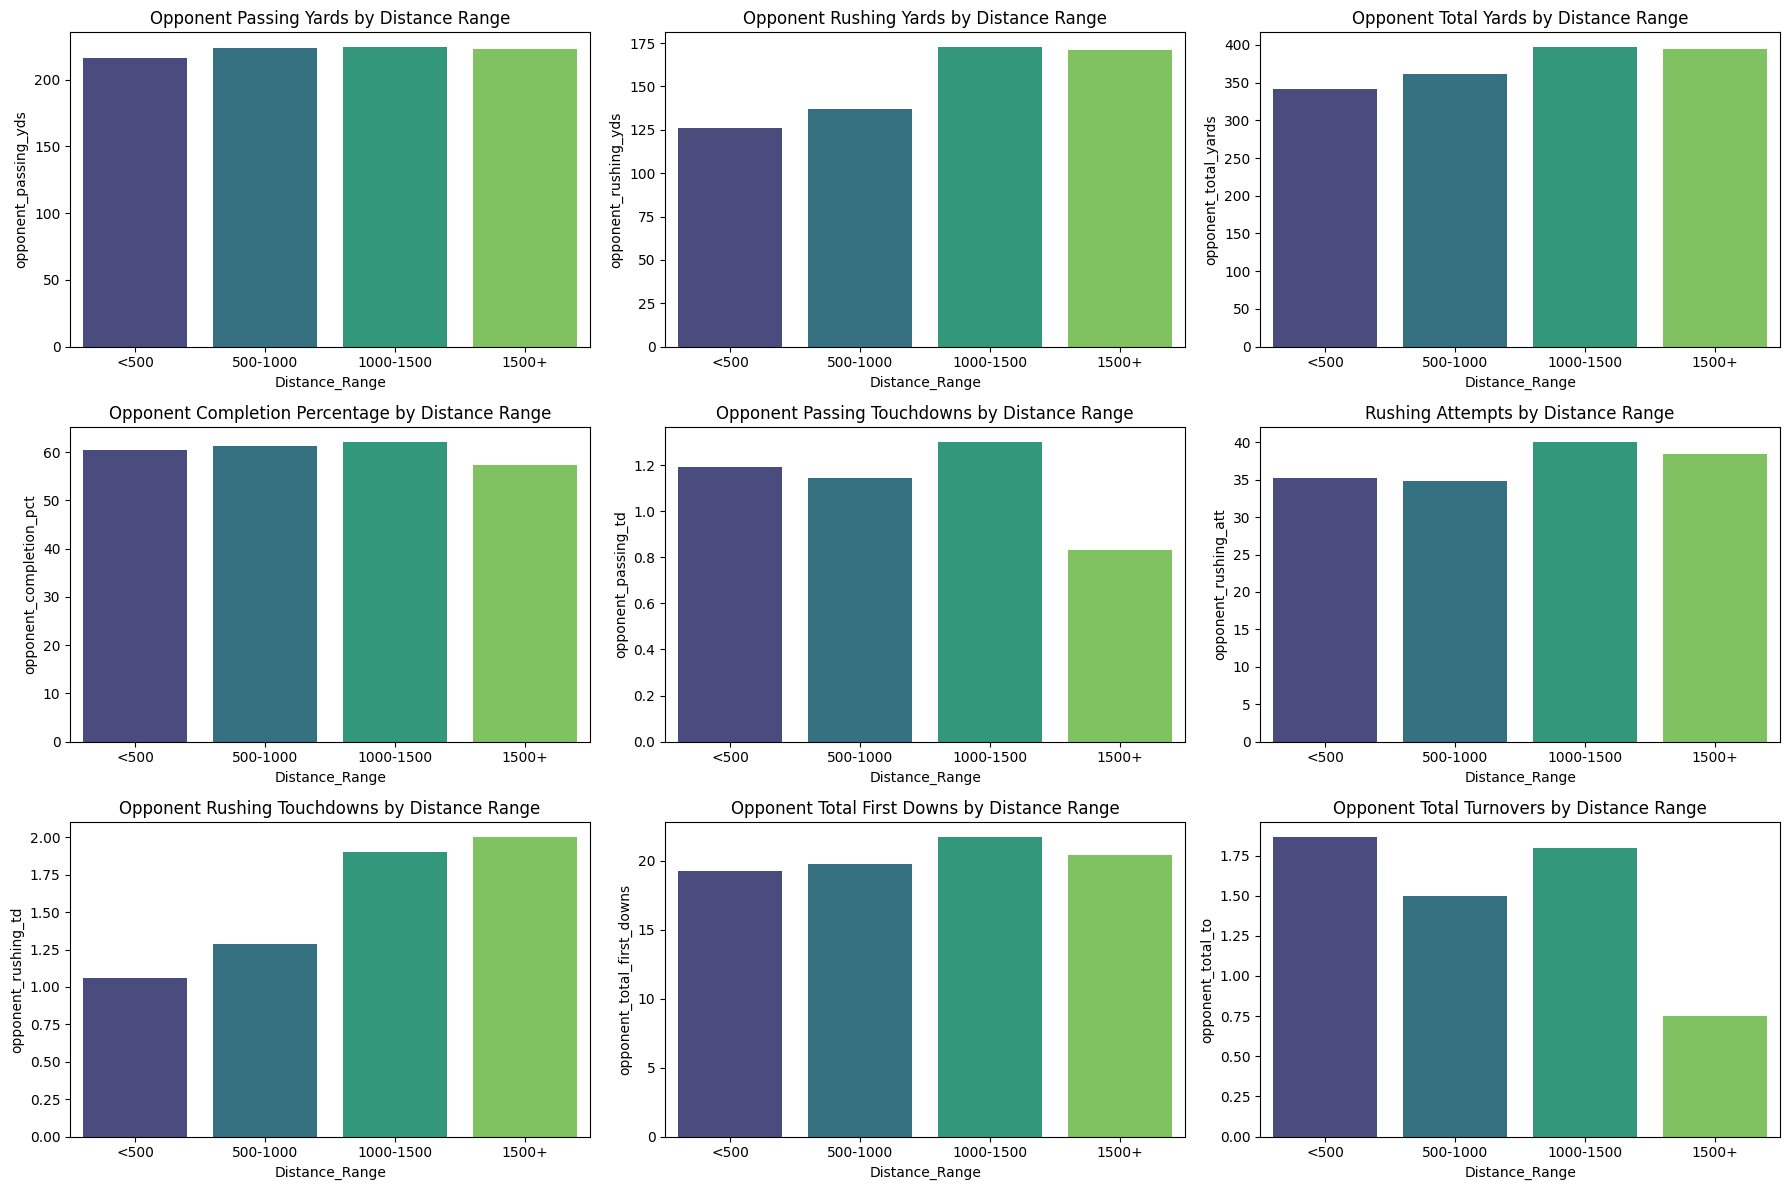

In [4]:

fig, axs = plt.subplots(3, 3, figsize=(18, 12))

# Passing Yards
sns.barplot(x='Distance_Range', y='opponent_passing_yds', data=distance_grouped, hue='Distance_Range', palette='viridis', ax=axs[0, 0], legend=False)
axs[0, 0].set_title('Opponent Passing Yards by Distance Range')

# Rushing Yards
sns.barplot(x='Distance_Range', y='opponent_rushing_yds', data=distance_grouped, hue='Distance_Range', palette='viridis', ax=axs[0, 1], legend=False)
axs[0, 1].set_title('Opponent Rushing Yards by Distance Range')

# Total Yards
sns.barplot(x='Distance_Range', y='opponent_total_yards', data=distance_grouped, hue='Distance_Range', palette='viridis', ax=axs[0, 2], legend=False)
axs[0, 2].set_title('Opponent Total Yards by Distance Range')

# Completion Percentage
sns.barplot(x='Distance_Range', y='opponent_completion_pct', data=distance_grouped, hue='Distance_Range', palette='viridis', ax=axs[1, 0], legend=False)
axs[1, 0].set_title('Opponent Completion Percentage by Distance Range')

# Passing Touchdowns
sns.barplot(x='Distance_Range', y='opponent_passing_td', data=distance_grouped, hue='Distance_Range', palette='viridis', ax=axs[1, 1], legend=False)
axs[1, 1].set_title('Opponent Passing Touchdowns by Distance Range')

# Rushing Attempts
sns.barplot(x='Distance_Range', y='opponent_rushing_att', data=distance_grouped, hue='Distance_Range', palette='viridis', ax=axs[1, 2], legend=False)
axs[1, 2].set_title('Rushing Attempts by Distance Range')

# Rushing Touchdowns
sns.barplot(x='Distance_Range', y='opponent_rushing_td', data=distance_grouped, hue='Distance_Range', palette='viridis', ax=axs[2, 0], legend=False)
axs[2, 0].set_title('Opponent Rushing Touchdowns by Distance Range')

# Total First Downs
sns.barplot(x='Distance_Range', y='opponent_total_first_downs', data=distance_grouped, hue='Distance_Range', palette='viridis', ax=axs[2, 1], legend=False)
axs[2, 1].set_title('Opponent Total First Downs by Distance Range')

# Total Turnovers
sns.barplot(x='Distance_Range', y='opponent_total_to', data=distance_grouped, hue='Distance_Range', palette='viridis', ax=axs[2, 2], legend=False)
axs[2, 2].set_title('Opponent Total Turnovers by Distance Range')


plt.tight_layout()
plt.show()


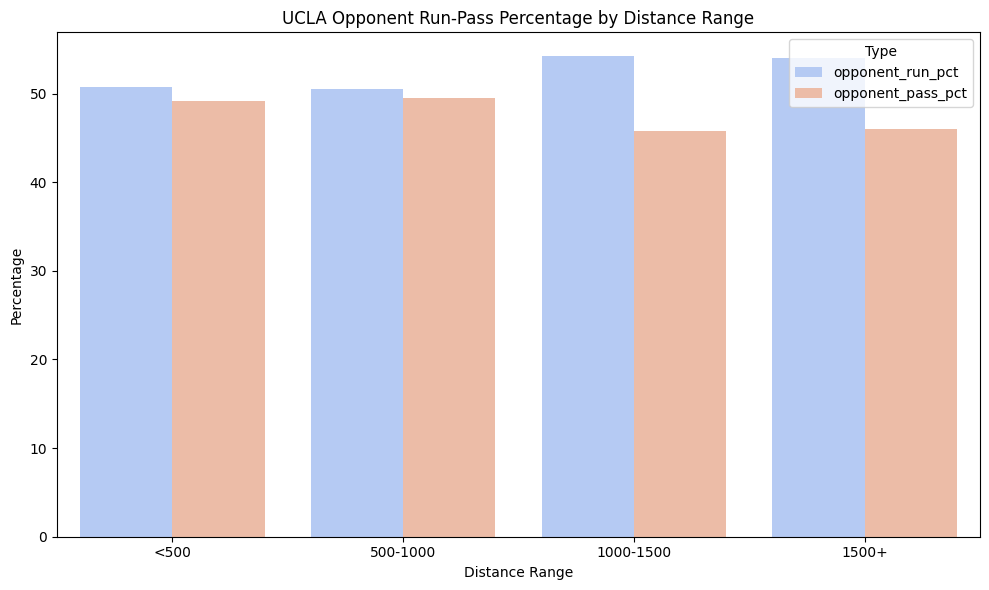

In [5]:
# Run-Pass Percentage
distance_grouped['opponent_run_pct'] = distance_grouped['opponent_rushing_att'] / (distance_grouped['opponent_rushing_att'] + distance_grouped['opponent_passing_att']) * 100
distance_grouped['opponent_pass_pct'] = distance_grouped['opponent_passing_att'] / (distance_grouped['opponent_rushing_att'] + distance_grouped['opponent_passing_att']) * 100


fig, ax = plt.subplots(figsize=(10, 6))

# Plot Run and Pass Percentages side by side
distance_grouped_melted = pd.melt(distance_grouped, id_vars=['Distance_Range'], value_vars=['opponent_run_pct', 'opponent_pass_pct'], var_name='Type', value_name='Percentage')

sns.barplot(x='Distance_Range', y='Percentage', hue='Type', data=distance_grouped_melted, palette='coolwarm')

# titles and labels
ax.set_title('UCLA Opponent Run-Pass Percentage by Distance Range')
ax.set_ylabel('Percentage')
ax.set_xlabel('Distance Range')

plt.tight_layout()
plt.show()


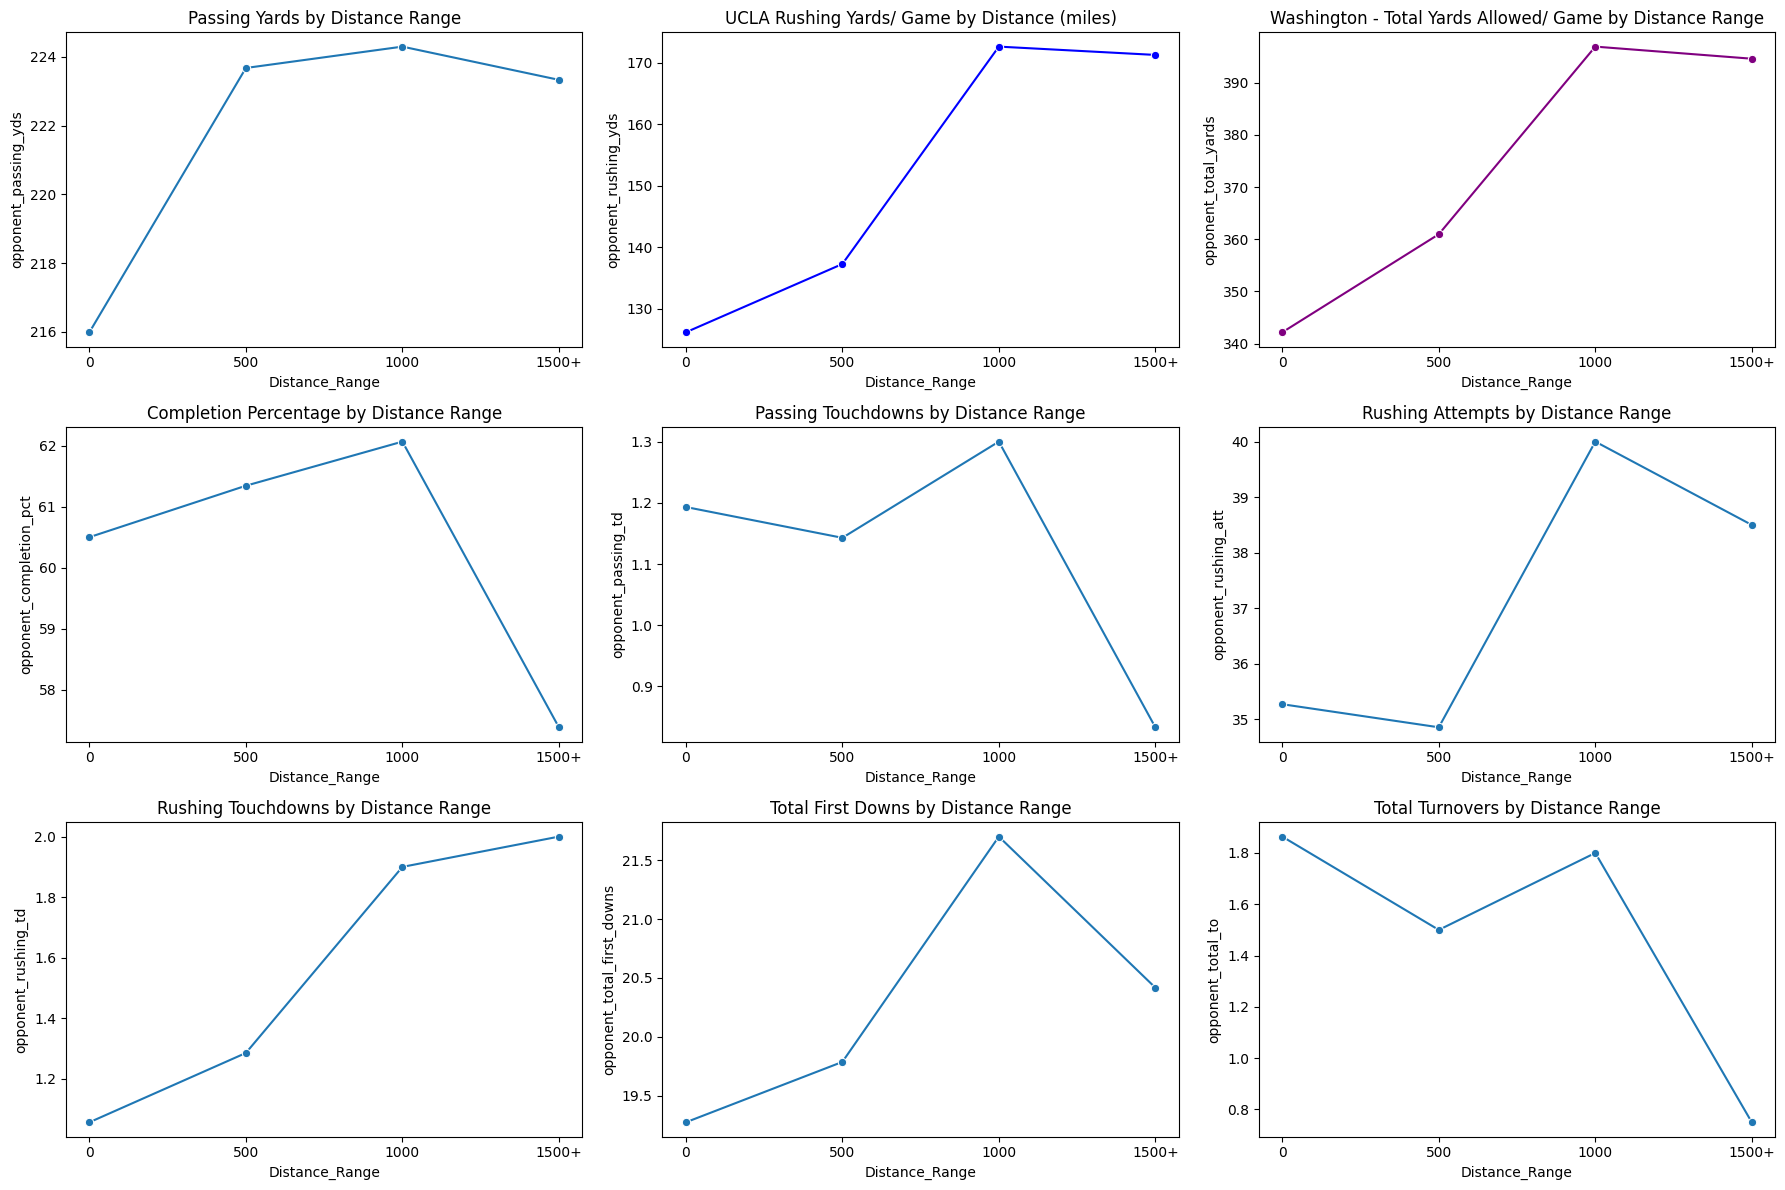

In [9]:

fig, axs = plt.subplots(3, 3, figsize=(18, 12))

# new labels for the Distance Range
distance_labels = ['0', '500', '1000', '1500+']

# Passing Yards
sns.lineplot(x='Distance_Range', y='opponent_passing_yds', data=distance_grouped, marker='o', ax=axs[0, 0])
axs[0, 0].set_title('Passing Yards by Distance Range')
axs[0, 0].set_xticklabels(distance_labels)

# Rushing Yards
sns.lineplot(x='Distance_Range', y='opponent_rushing_yds', data=distance_grouped, marker='o', ax=axs[0, 1], color = 'blue')
axs[0, 1].set_title('UCLA Rushing Yards/ Game by Distance (miles)')
axs[0, 1].set_xticklabels(distance_labels)

# Total Yards
sns.lineplot(x='Distance_Range', y='opponent_total_yards', data=distance_grouped, marker='o', ax=axs[0, 2], color = 'purple')
axs[0, 2].set_title('Washington - Total Yards Allowed/ Game by Distance Range')
axs[0, 2].set_xticklabels(distance_labels)

# Completion Percentage
sns.lineplot(x='Distance_Range', y='opponent_completion_pct', data=distance_grouped, marker='o', ax=axs[1, 0])
axs[1, 0].set_title('Completion Percentage by Distance Range')
axs[1, 0].set_xticklabels(distance_labels)

# Passing Touchdowns
sns.lineplot(x='Distance_Range', y='opponent_passing_td', data=distance_grouped, marker='o', ax=axs[1, 1])
axs[1, 1].set_title('Passing Touchdowns by Distance Range')
axs[1, 1].set_xticklabels(distance_labels)

# Rushing Attempts
sns.lineplot(x='Distance_Range', y='opponent_rushing_att', data=distance_grouped, marker='o', ax=axs[1, 2])
axs[1, 2].set_title('Rushing Attempts by Distance Range')
axs[1, 2].set_xticklabels(distance_labels)

# Rushing Touchdowns
sns.lineplot(x='Distance_Range', y='opponent_rushing_td', data=distance_grouped, marker='o', ax=axs[2, 0])
axs[2, 0].set_title('Rushing Touchdowns by Distance Range')
axs[2, 0].set_xticklabels(distance_labels)

# Total First Downs
sns.lineplot(x='Distance_Range', y='opponent_total_first_downs', data=distance_grouped, marker='o', ax=axs[2, 1])
axs[2, 1].set_title('Total First Downs by Distance Range')
axs[2, 1].set_xticklabels(distance_labels)

# Total Turnovers
sns.lineplot(x='Distance_Range', y='opponent_total_to', data=distance_grouped, marker='o', ax=axs[2, 2])
axs[2, 2].set_title('Total Turnovers by Distance Range')
axs[2, 2].set_xticklabels(distance_labels)


plt.tight_layout()
plt.show()
